load_fullsegment_amp0.2pi.csv


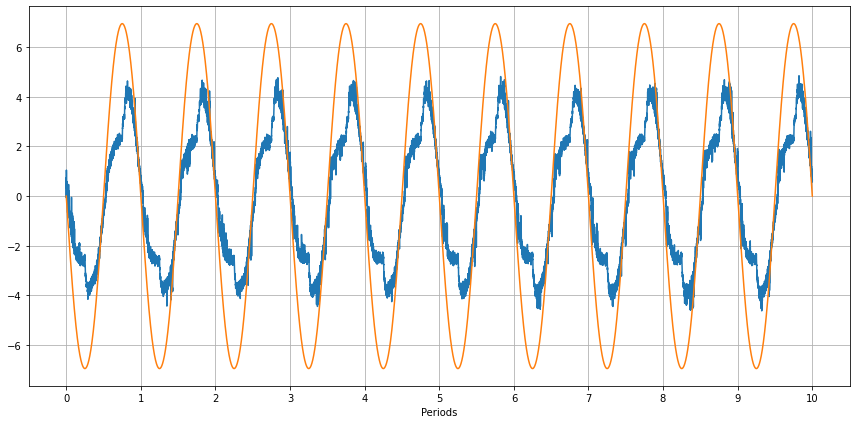

In [1]:
### Read in data
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

folder = "../JointRepeatabilityTests/joint7"

# Robot params
m = 6 # kg, mass
L = 0.45 # m, length of segment
d = 0.2 # m, distance to COM of segment
g = 9.8 # m/s^2
I = (1/3) * m * L**2 # moment of inertia of segment about its end

# Trajectory params
num_samples = 3200
num_periods = 10
A = 0.2 * np.pi # Amplitude
w = 2*np.pi/num_samples # freq
x = np.arange(num_samples*num_periods+1)
theta = A * np.sin(w*x)
torque_expected = -1*(m*g*d*np.sin(theta) + I*A*w**2 * np.sin(w*x))




for file in os.listdir(folder):
	if file.endswith(".csv"):
		print(file)
		df = pd.read_csv(os.path.join(folder, file))
		# print(df["time"][np.linspace(0, 32000, 11).astype(int)])
		period_ticks = df["time"][np.linspace(0, 32000, 11).astype(int)].values

		# Trajectory params
		t = df["time"].values
		num_samples = 3200
		num_periods = 10
		A = 0.2 * np.pi # Amplitude
		t_period = t[-1] / 10
		w = 2*np.pi / t_period # freq

		x = np.arange(num_samples*num_periods+1)
		theta = A * np.sin(w*t)
		torque_expected = -1*(m*g*d*np.sin(theta) + I*A*w**2 * np.sin(w*t))
		t_inertia = - I*A*w**2 * np.sin(w*t)

		plt.figure(figsize=(12, 6), facecolor="white")
		# plt.plot(t, df["m_pos"])
		plt.plot(t, df["torque"])
		# plt.plot(t, theta)
		plt.plot(t, torque_expected)
		# plt.plot(t, t_inertia)
		plt.xticks(ticks=period_ticks, labels=np.arange(11))
		plt.xlabel("Periods")
		plt.grid(True)
		plt.tight_layout()
		plt.show()

		break

In [10]:
np.linspace(0, 32000, 11)

array([    0.,  3200.,  6400.,  9600., 12800., 16000., 19200., 22400.,
       25600., 28800., 32000.])